# Tennis points won

In the `tennis.csv` files of games played by Federer.

Does Federer score more total points than his opponent on average in a game?

In [3]:
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns

In [4]:
df = pd.read_csv('data/tennis.csv')

In [5]:
avg = ((df['player1 total points won'] > df['player2 total points won']).sum() / len(df['player1 total points won']))*100

In [6]:
print(avg)

72.4342663273961


# 2. College correlations

The `college.csv` filecontains a number of variables for 777 different universities and colleges in the US.

### 2.1

Use a scatterplot matrix to analyze the data and answer the following questions:

1. Which columns are possibly from a normal distribution? Statistically test if this is the case (you'll find a function for it in `scipy.stats`). For each explain if it is or not normally distributed.

2. Of the columns that aren't normally distributed, name which distribution could possibly fit them? (Use your research skills)

3. Give 3 pairs of columns that are highly correlated? Give their correlation coefficients.

4. Give 3 column pairs that are not correlated? Give their correlation coefficients.

In [12]:
college = pd.read_csv('data/college.csv')
print(list(college))
college.rename(columns = {'Unnamed: 0':'College'}, inplace = True)
# sns.pairplot(college)

['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A84537A460>,
      dtype=object)

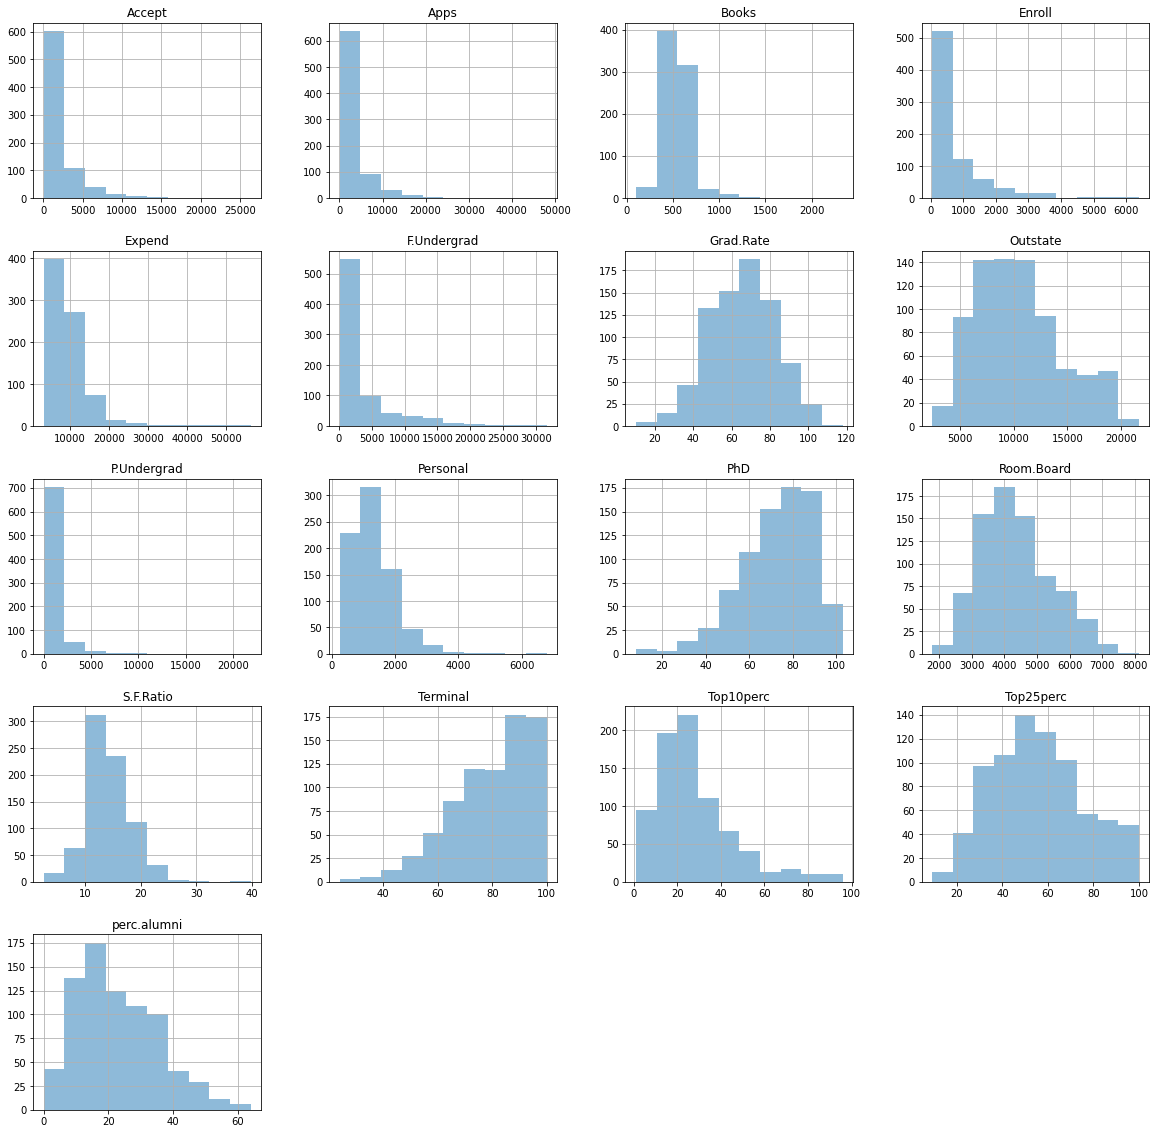

In [37]:
college.hist(alpha=0.5,figsize=(20,20))

In [38]:
# pd.plotting.scatter_matrix(college, alpha=0.5, figsize=(20,20))

In [33]:
import scipy.stats
scipy.stats.normaltest(college['Grad.Rate'])
results = []
for i in range(2, len(list(college))):
#     print(college.iloc[:,[i]])
    scipy.stats.normaltest(college.iloc[:,[i]])
    results.append((list(college)[i], scipy.stats.normaltest(college.iloc[:,[i]])))
results

[('Apps',
  NormaltestResult(statistic=array([671.65167212]), pvalue=array([1.42132213e-146]))),
 ('Accept',
  NormaltestResult(statistic=array([609.50702176]), pvalue=array([4.43845565e-133]))),
 ('Enroll',
  NormaltestResult(statistic=array([460.83361031]), pvalue=array([8.53597201e-101]))),
 ('Top10perc',
  NormaltestResult(statistic=array([196.97926198]), pvalue=array([1.68459976e-43]))),
 ('Top25perc',
  NormaltestResult(statistic=array([28.76811146]), pvalue=array([5.6634878e-07]))),
 ('F.Undergrad',
  NormaltestResult(statistic=array([439.83402918]), pvalue=array([3.099232e-96]))),
 ('P.Undergrad',
  NormaltestResult(statistic=array([912.20355428]), pvalue=array([8.27018074e-199]))),
 ('Outstate',
  NormaltestResult(statistic=array([39.10401776]), pvalue=array([3.22604508e-09]))),
 ('Room.Board',
  NormaltestResult(statistic=array([28.35890067]), pvalue=array([6.94933043e-07]))),
 ('Books',
  NormaltestResult(statistic=array([650.97247492]), pvalue=array([4.39666256e-142]))),
 (

In [17]:
scipy.stats.normaltest(college['Grad.Rate'])

NormaltestResult(statistic=3.211724796952507, pvalue=0.20071638274662004)

In [40]:
# 1. Which columns are possibly from a normal distribution? Statistically test if this is the case (you'll find a function for it in `scipy.stats`). For each explain if it is or not normally distributed.
    # Grad Rate is normally distributed, with a p-value 0.200

In [44]:
# 2. Of the columns that aren't normally distributed, name which distribution could possibly fit them? (Use your research skills)
scipy.stats.poisson.college['Enroll'])

0       721
1       512
2       336
3       137
4        55
       ... 
772     543
773     695
774     695
775    1317
776     691
Name: Enroll, Length: 777, dtype: int64

In [58]:
# 3. Give 3 pairs of columns that are highly correlated? Give their correlation coefficients.

    # Note that we generally use the correlation coefficient to analyze data, because it's easy to interpret:
    # negative 1 is perfect negative correlation
    # 0 is perfectly uncorrelated
    # plus 1 is perfect correlation
    
correlation = college.corr()
correlation.replace(1,np.nan)

# Apps & Accept: 0.943451
# Accept & enroll: 0.911637
# Enroll & F.Undergrad: 0.964640

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,NaN,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,NaN,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,NaN,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,NaN,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,NaN,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,NaN,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,NaN,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,NaN,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,NaN,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,NaN,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [59]:
# 4. Give 3 column pairs that are not correlated? Give their correlation coefficients.

# Bookes & Grade Rate: 0.001061
# F. Undergrad & Expend: 0.018652
# Books & S.F. Ration: -0.031929

### 2.2 Boxplot

Make a boxplot of private vs outstate colleges. It should look like:

![](boxplort.png)

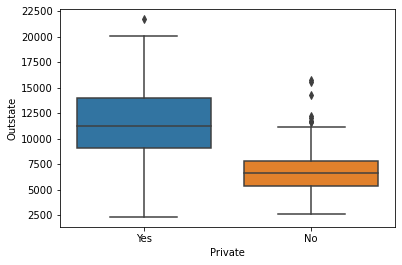

In [60]:
college_p_o = college[['Private', 'Outstate']]
ax = sns.boxplot(x="Private", y="Outstate", data=college_p_o)

# 3. Auto data

The `auto.csv` data file is malformed.

Fix it (using only python) so that it can be read into pandas, and then give a scatterplot matrix of horsepower, weight, year and mpg.

Did cars get more efficient over time? Make an argument on this question.

In [87]:
auto = pd.read_csv('data/auto.csv',delim_whitespace=True)

In [90]:
auto = auto.drop([0,0])

In [91]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
5,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.00,2790.0,15.6,82.0,1.0,ford mustang gl
394,44.0,4.0,97.0,52.00,2130.0,24.6,82.0,2.0,vw pickup
395,32.0,4.0,135.0,84.00,2295.0,11.6,82.0,1.0,dodge rampage
396,28.0,4.0,120.0,79.00,2625.0,18.6,82.0,1.0,ford ranger


In [98]:
auto[['horsepower','weight','year','mpg']]

,horsepower,weight,year,mpg
1,130.0,3504.0,70.0,18.0
2,165.0,3693.0,70.0,15.0
3,150.0,3436.0,70.0,18.0
4,150.0,3433.0,70.0,16.0
5,140.0,3449.0,70.0,17.0
...,...,...,...,...
393,86.00,2790.0,82.0,27.0
394,52.00,2130.0,82.0,44.0
395,84.00,2295.0,82.0,32.0
396,79.00,2625.0,82.0,28.0


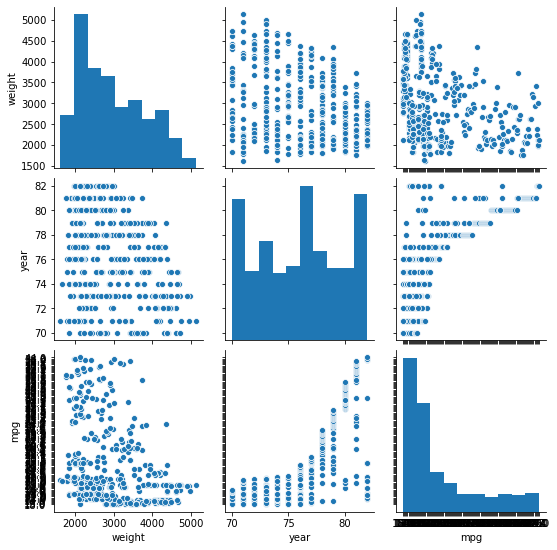

In [99]:
sns.pairplot(auto[['horsepower','weight','year','mpg']])

### 3.2 Auto Statistics

What is the mean, median and standard deviation of each quantitative feature?


In [65]:
auto.describe()
auto1 = auto.drop([10,85])
auto1.describe() # No major changes

,cylinders,displacement,weight,acceleration,year,origin
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,5.455696,193.279747,2970.237975,15.571139,76.020253,1.572152
std,1.699488,104.061132,847.764300,2.733497,3.681425,0.800846
min,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,104.500000,2224.500000,13.850000,73.000000,1.000000
50%,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,8.000000,262.000000,3607.000000,17.150000,79.000000,2.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 3.3 data removal

Remove the 10th through 85th observations. 

Does the mean statistically significantly change for each of the columns?



# 4. Boston housing dataset

You can use `from sklearn.datasets import load_boston` to load the boston housing dataset.

The `load_boston()['DESCR']` will describe columns for you.

Are any of the columns associated with per capita crime rate? If so, show the numeric relationship and give a possible explanation for highly correlated/negatively correlated features

In [67]:
# https://scikit-learn.org/0.16/modules/generated/sklearn.datasets.load_boston.html
# https://www.programcreek.com/python/example/82897/sklearn.datasets.load_boston

from sklearn.datasets import load_boston
boston=load_boston()
print(boston['DESCR'])
df_boston = pd.DataFrame(boston['data'])
df_boston.columns = boston['feature_names']
df_boston.corr()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [81]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [82]:
df_boston.CRIM.max()

88.9762

### 4.2 Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios?




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


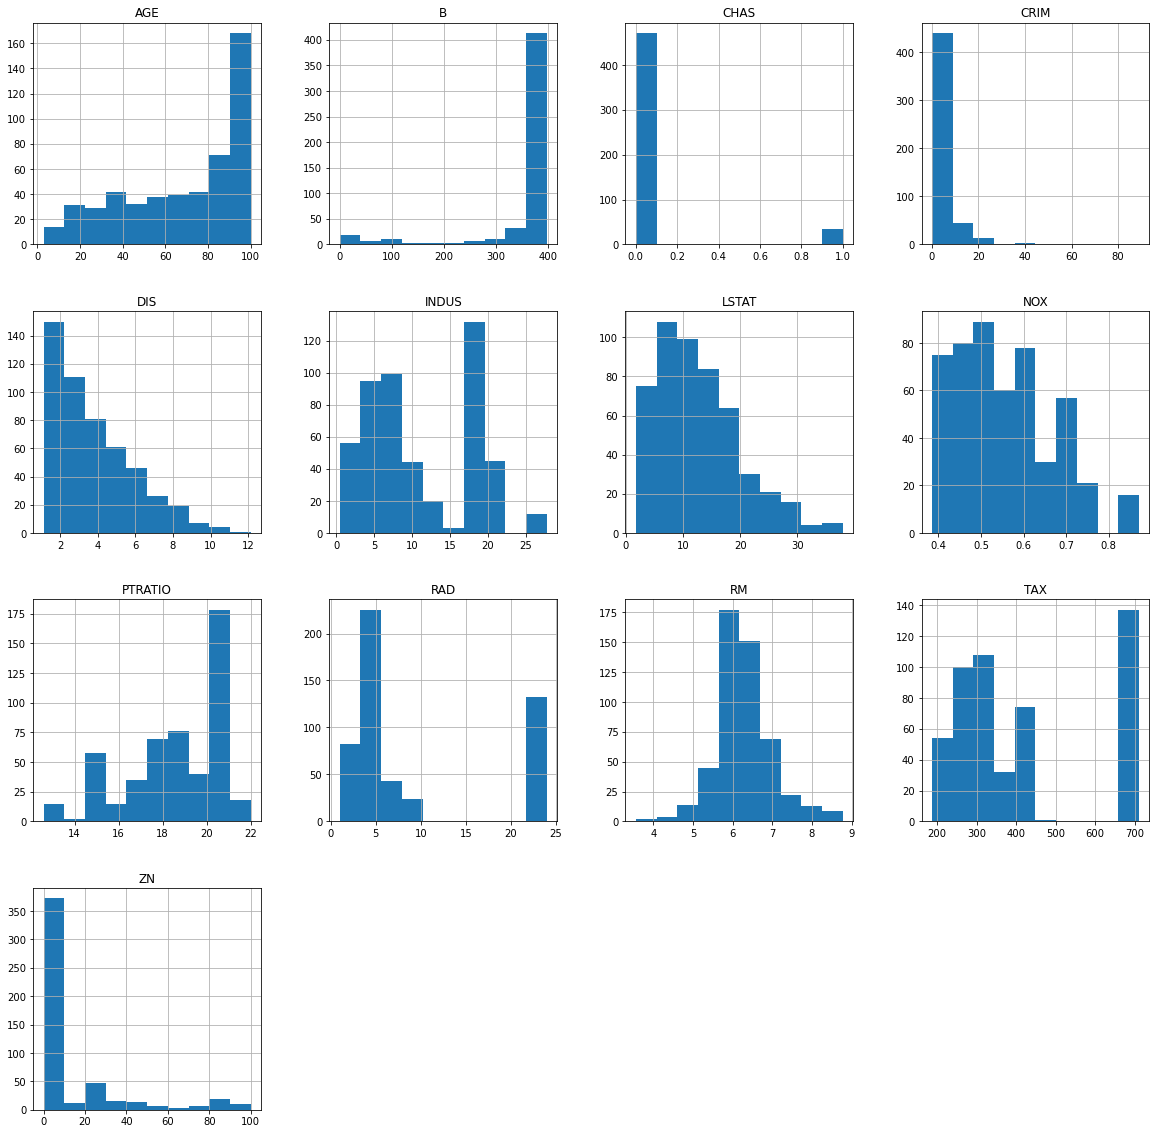

In [68]:
df_boston.hist(figsize=(20,20))
df_boston.describe()

### 4.3 How many of the suburbs in this data set bound the Charles river?

In [84]:
df_boston.CHAS.sum()

35.0

### 4.4 What is the median pupil-teacher ratio among the towns in this data set?

In [85]:
df_boston.PTRATIO.median()

19.05

### 4.5 Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.



In [70]:
df_boston['MEDV'] = load_boston()['target']
df_boston['MEDV'].idxmin()

398

### 4.6 In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.




In [71]:
len(df_boston.loc[df_boston.RM > 7])
len(df_boston.loc[df_boston.RM > 8])

13